<a href="https://colab.research.google.com/github/chenliyo99/pyspark/blob/main/machine_learning_for_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir ~/.kaggle

In [4]:
!touch ~/.kaggle/kaggle.json

In [5]:
api_token = {"username":"chenliyo99","key":"ffad98dafbb569289dc3bab92791b9b4"}

In [6]:

import json

with open('/root/.kaggle/kaggle.json','w') as file:
    json.dump(api_token,file)


In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --force

 99% 2.28G/2.29G [00:20<00:00, 129MB/s]
100% 2.29G/2.29G [00:20<00:00, 120MB/s]


In [9]:
import zipfile
with zipfile.ZipFile('./chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

In [10]:
import glob
import random
import matplotlib.pyplot as plt



def get_random_image(dir,condition):
    placeholder=''
    if condition == 'n':
        placeholder='NORMAL'
    elif condition == 'p':
        placeholder='PNEUMONIA'
    else:
        raise Exception("Sorry, invalid condition")
    folder=f'./data/chest_xray/{dir}/{placeholder}/*.jpeg'
    img_paths=glob.glob(folder)
    max_length=len(img_paths)
    randomNumber=random.randint(0,max_length)
    for index, item in enumerate(img_paths, start=1):
        if index == randomNumber:
            print(index,item)
            image = plt.imread(item)
            readyImage=plt.imshow(image)
            return readyImage


4 ./data/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg


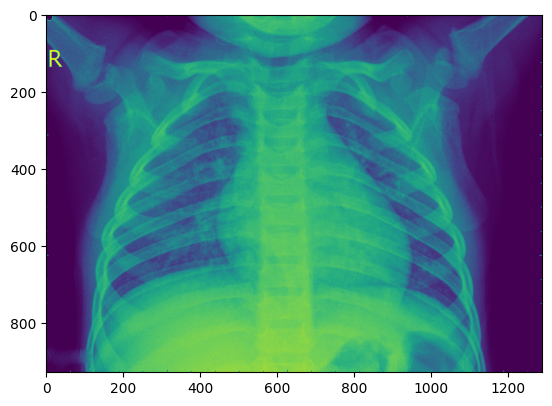

In [11]:
get_random_image("val","n")

In [14]:

from PIL import Image

image = Image.open('./data/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg')
print(image.format)
print(image.size)
print(image.mode)


JPEG
(1288, 928)
L


In [23]:
!ls data

chest_xray


In [15]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder=f'./data/chest_xray/train/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1


In [16]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder=f'./data/chest_xray/test/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1

In [24]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder=f'./data/chest_xray/val/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1


In [25]:
import glob
import pandas as pd

folder=f'./data/chest_xray/*/*.jpeg'

category=[]
filenames=[]
condition_of_lung=[]

all_files=glob.glob(folder)

for filename in all_files:
    if "train" in filename:
        if "pneumonia" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "test" in filename:
        if "pneumonia" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "val" in filename:
        if "pneumonia" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("normal")

all_data_df=pd.DataFrame({"dataset type":category,"x-ray result":condition_of_lung,"filename":filenames})

print(all_data_df.head())



  dataset type x-ray result                                       filename
0         test    pneumonia   ./data/chest_xray/test/test_pneumonia13.jpeg
1         test    pneumonia  ./data/chest_xray/test/test_pneumonia215.jpeg
2         test    pneumonia   ./data/chest_xray/test/test_pneumonia74.jpeg
3         test    pneumonia  ./data/chest_xray/test/test_pneumonia186.jpeg
4         test    pneumonia  ./data/chest_xray/test/test_pneumonia270.jpeg


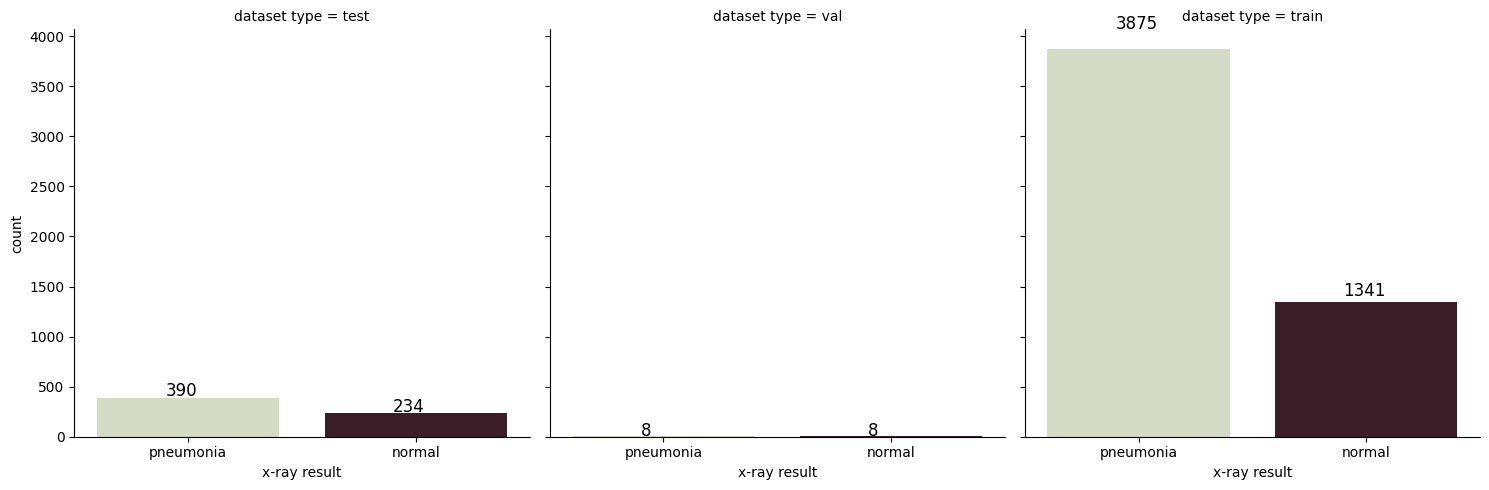

In [26]:


import seaborn as sns

g=sns.catplot(x="x-ray result",col="dataset type",kind="count",palette="ch:.55",data=all_data_df,legend=True)

for i in range(0,3):
    ax=g.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x()+0.3,
        p.get_height()*1.05,
        '{0:.0f}'.format(p.get_height()),
        color='black',
        rotation='horizontal',
        size='large')



In [27]:
import glob
import pandas as pd
import os
train_folder='./data/chest_xray/train/*.jpeg'
train_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype=object)
train_imgs_path=glob.glob(train_folder)
counter=0
class_arg=''

for i in train_imgs_path:
    if "pneumonia" in i:
        class_arg=1
    else:
        class_arg=0
    train_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1
print(train_df_lst.head())

   labels                   s3_path
0       1    train_pneumonia41.jpeg
1       1   train_pneumonia622.jpeg
2       0      train_normal826.jpeg
3       0      train_normal653.jpeg
4       1  train_pneumonia1159.jpeg


In [28]:


import glob
import pandas as pd
import os
test_folder='./data/chest_xray/test/*.jpeg'
test_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype=object)
test_imgs_path=glob.glob(test_folder)
counter=0
class_arg=''

for i in test_imgs_path:
    if "pneumonia" in i:
        class_arg=1
    else:
        class_arg=0
    test_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1
print(test_df_lst.head())



   labels                 s3_path
0       1   test_pneumonia13.jpeg
1       1  test_pneumonia215.jpeg
2       1   test_pneumonia74.jpeg
3       1  test_pneumonia186.jpeg
4       1  test_pneumonia270.jpeg


In [29]:


def save_to_lst(df,prefix):
    return df[["labels","s3_path"]].to_csv(
    f"{prefix}.lst", sep='\t',index=True,header=False
    )

save_to_lst(train_df_lst.copy(),"train")
save_to_lst(test_df_lst.copy(),"test")

